In [99]:
# dataset link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# Project Name: Spam and Ham Predictor

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud

from collections import Counter

import pickle

In [101]:
df = pd.read_csv('spam_ham.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [103]:
# drop useless column in dataframe
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
# renaming cloumn name
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
# label encoder - target column
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
# chekcing for null values
df.isnull().sum()

,0
target,0
text,0


In [107]:
# checking duplicate values
df.duplicated().sum()

403

In [108]:
# remove duplicates rows
df.drop_duplicates(inplace=True, keep='first')
df.duplicated().sum()

0

In [109]:
df.shape

(5169, 2)

Performing EDA

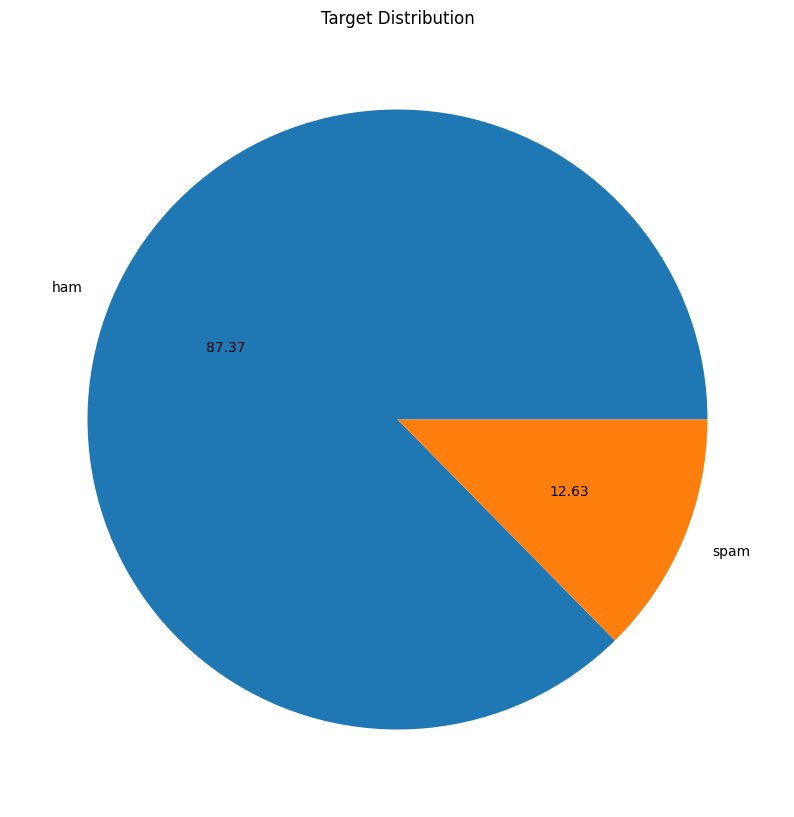

In [110]:
plt.figure(figsize=(10,11))
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.title('Target Distribution')
plt.show()

In [111]:
# create column number_characters
df['number_characters'] = df['text'].apply(len)
df.head()

,target,text,number_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [112]:
# download punkt, punkt_tab, stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
# create a column number_words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,number_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [114]:
# create column for number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,number_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


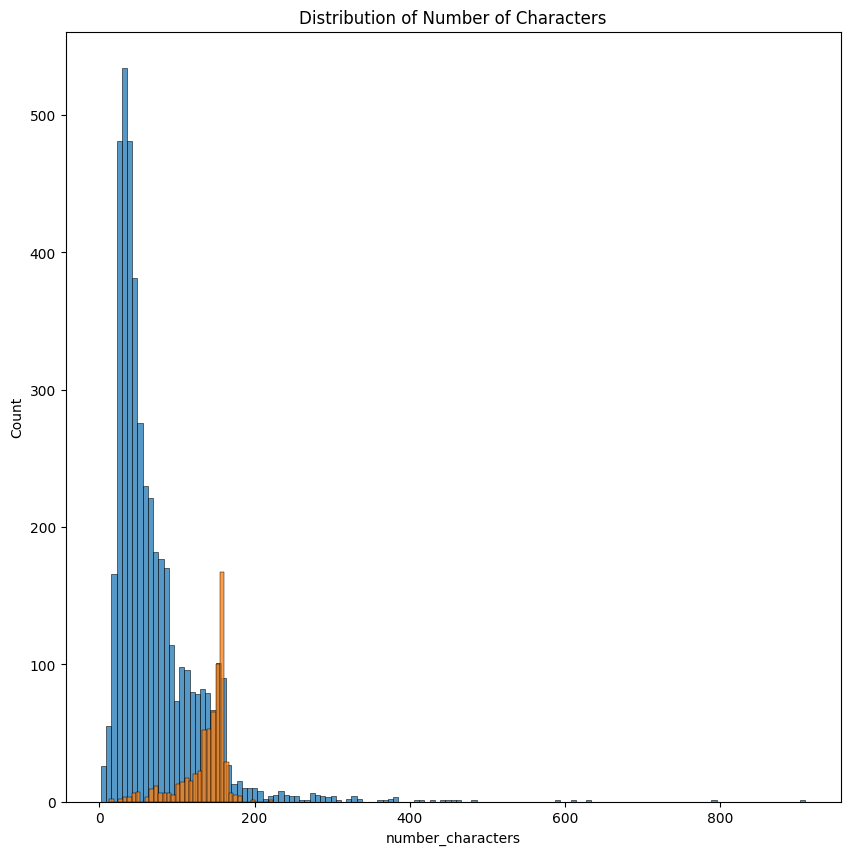

In [115]:
# histplot for number of characters
sns.histplot(df['number_characters'][df['target']==0])
sns.histplot(df['number_characters'][df['target']==1])
plt.title('Distribution of Number of Characters')
plt.show()

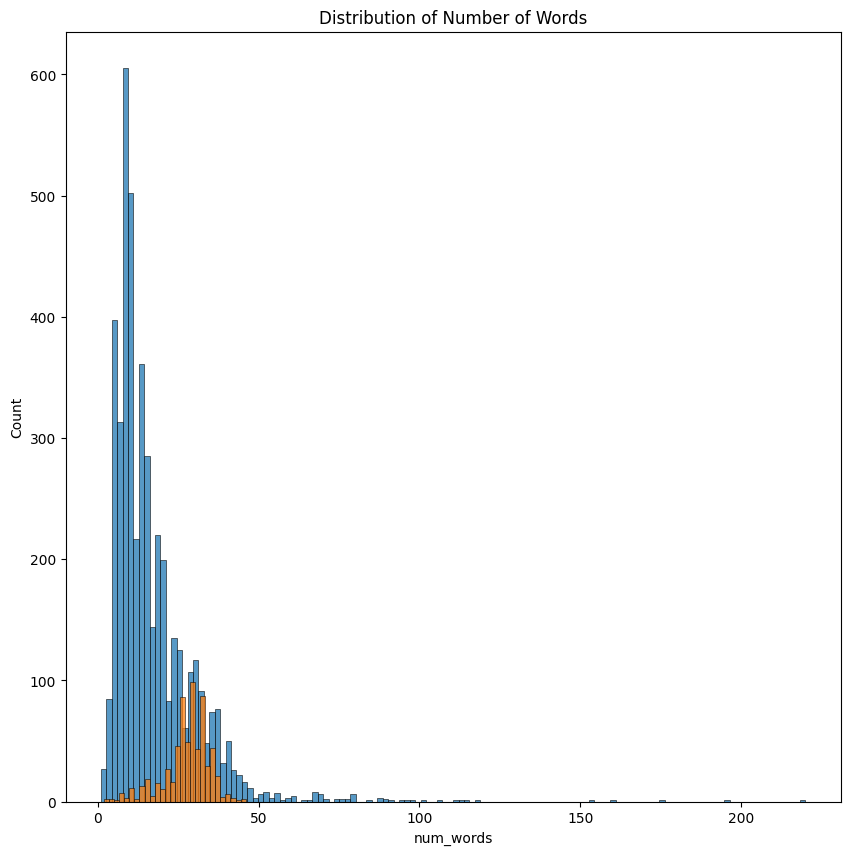

In [116]:
# histplot for word count
sns.histplot(df['num_words'][df['target']==0])
sns.histplot(df['num_words'][df['target']==1])
plt.title('Distribution of Number of Words')
plt.show()

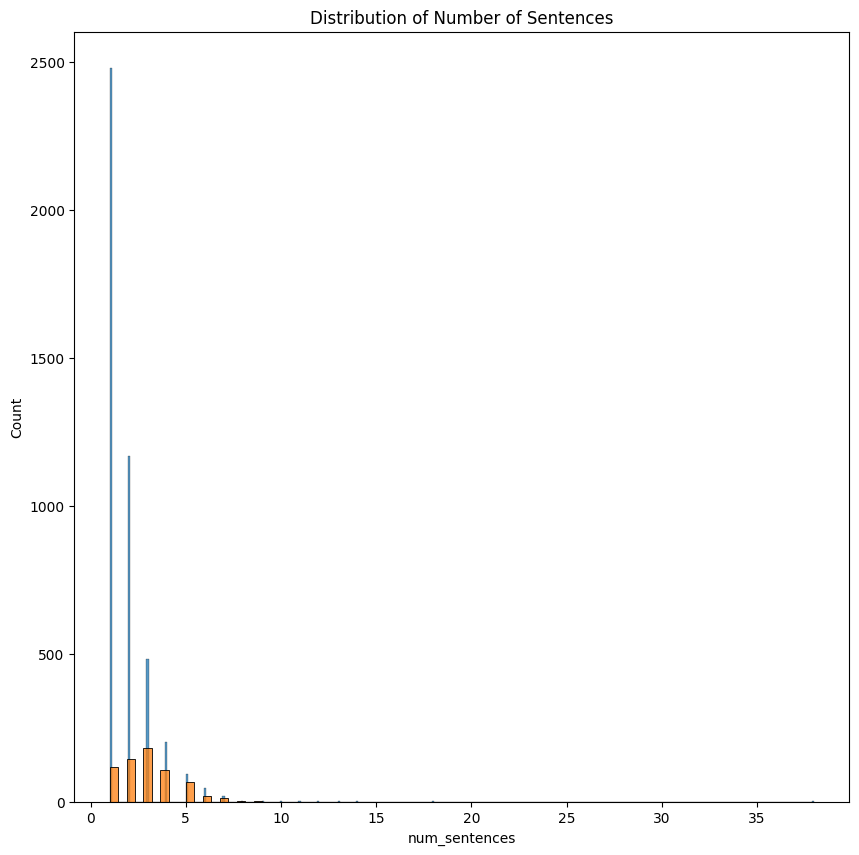

In [117]:
# histplot for sentence count
sns.histplot(df['num_sentences'][df['target']==0])
sns.histplot(df['num_sentences'][df['target']==1])
plt.title('Distribution of Number of Sentences')
plt.show()

**Data Preprocessing**

*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming

In [118]:
ps = PorterStemmer()

def Tranform_Text(text):
  # convert to lower text
  text = text.lower()

  # extract words
  text = nltk.word_tokenize(text)

  y = []
  # extract only alpha numeric word
  for w in text:
    if w.isalnum():
      y.append(w)

  text = y[:]
  y.clear()

  # removing stop words and puntuations
  for w in text:
    if w not in stopwords.words('english') and w not in string.punctuation:
      y.append(w)

  text = y[:]
  y.clear()

  # word stemming
  for w in text:
    y.append(ps.stem(w))



  return " ".join(y)


In [119]:
# create a column tranformed_text
df['transformed_text'] = df['text'].apply(Tranform_Text)
df.head()

,target,text,number_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


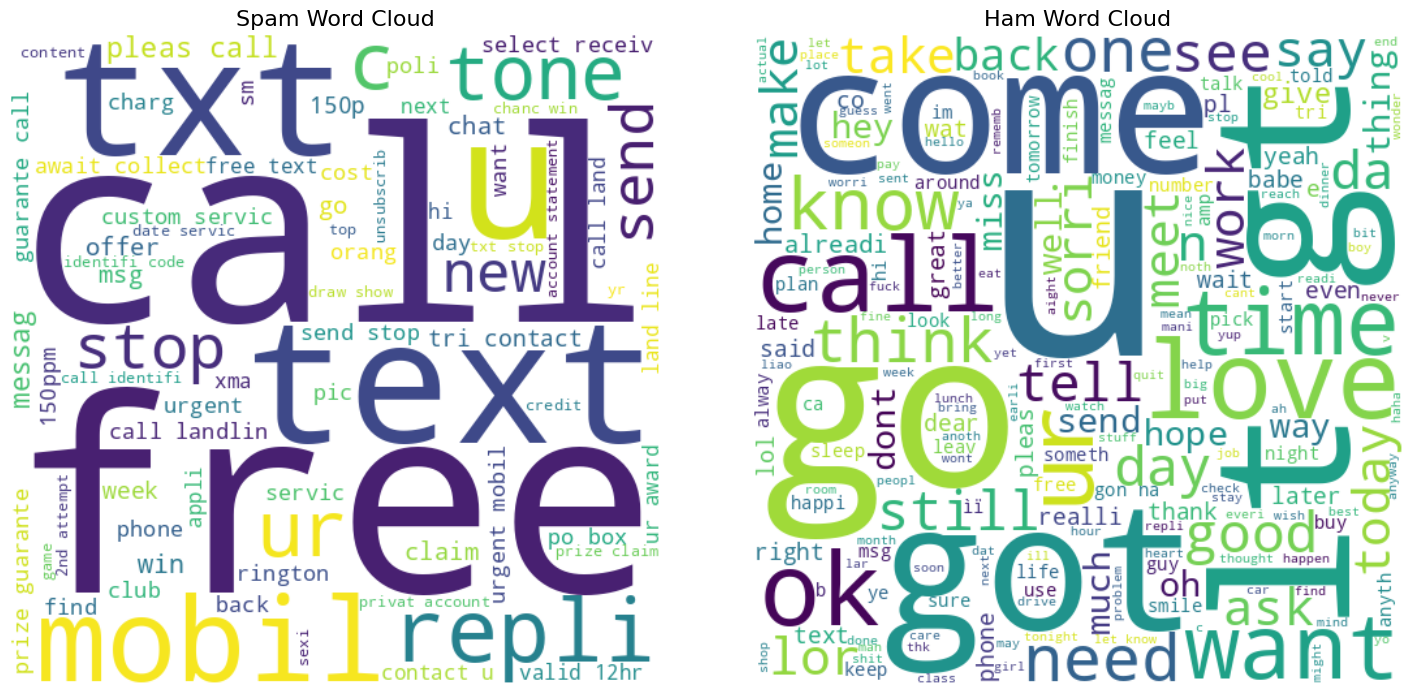

In [120]:
# checking wordclound
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# Plot Spam Word Cloud
axes[0].imshow(spam_wc, interpolation="bilinear")
axes[0].set_title('Spam Word Cloud', fontsize=16)
axes[0].axis('off')  # Turn off axis

# Plot Ham Word Cloud
axes[1].imshow(ham_wc, interpolation="bilinear")
axes[1].set_title('Ham Word Cloud', fontsize=16)
axes[1].axis('off')  # Turn off axis

# Show the plots
plt.tight_layout()
plt.show()

In [121]:
# spam corpus
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

len(spam_corpus)

9939

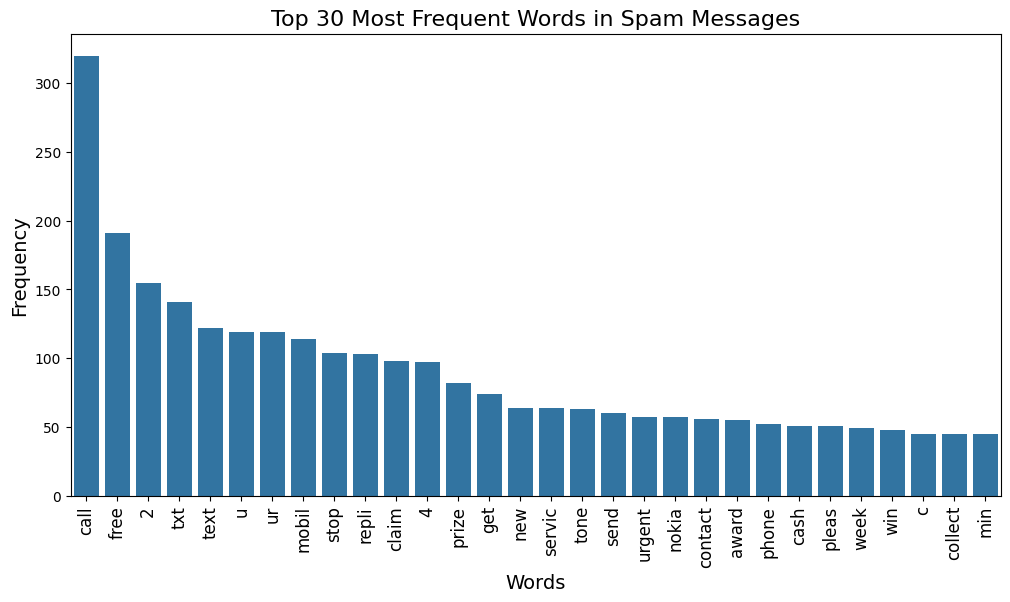

In [122]:
# barplot for spam corpus

# Count the most common words
spam_word_counts = Counter(spam_corpus).most_common(30)

# Unzip the words and their frequencies
words, frequencies = zip(*spam_word_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(frequencies))
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Top 30 Most Frequent Words in Spam Messages', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [123]:
# ham word corpus
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

35404

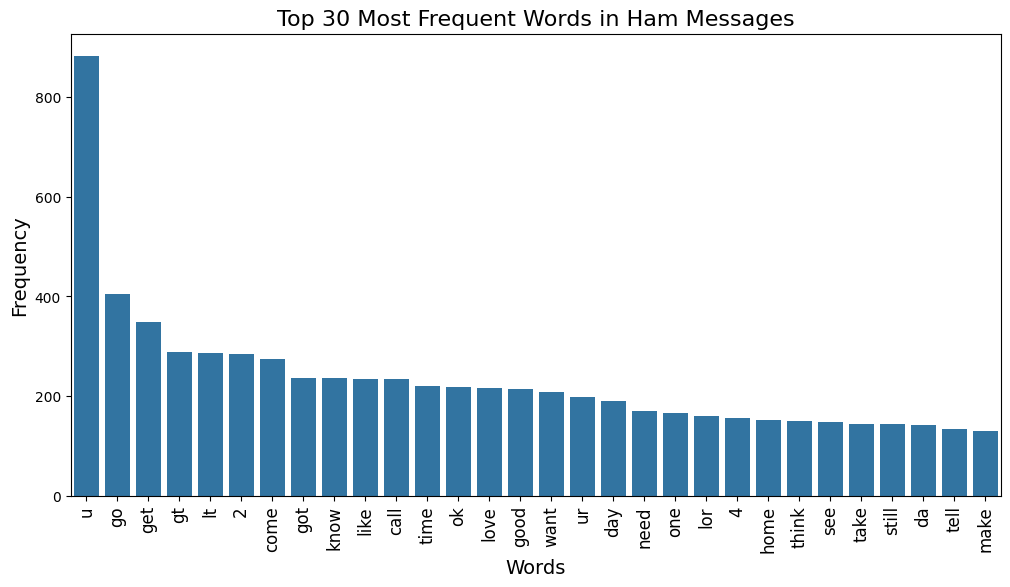

In [124]:
# bar plot for ham corpus
ham_word_counts = Counter(ham_corpus).most_common(30)

# Unzip the words and their frequencies
words, frequencies = zip(*ham_word_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(frequencies))
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Top 30 Most Frequent Words in Ham Messages', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [125]:
df.head()

,target,text,number_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [126]:
# text_trandform - conver to tfidf vectorizer
tfidf = TfidfVectorizer(max_features=3000)
# store tfidf in X
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [127]:
# store target in y
y = df['target'].values
y.shape

(5169,)

In [128]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [129]:
# variants of naive bayes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [130]:
# checking accuracy on gnb
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Precision Score: ", precision_score(y_test, y_pred1))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))

Accuracy Score:  0.8694390715667312
Precision Score:  0.5068493150684932
Confusion Matrix: 
 [[788 108]
 [ 27 111]]


In [131]:
# checking accuracy on mnb
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))

Accuracy Score:  0.9709864603481625
Precision Score:  1.0
Confusion Matrix: 
 [[896   0]
 [ 30 108]]


In [132]:
# checking accuracy on bnb
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Precision Score: ", precision_score(y_test, y_pred3))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred3))

Accuracy Score:  0.9835589941972921
Precision Score:  0.991869918699187
Confusion Matrix: 
 [[895   1]
 [ 16 122]]


In [135]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

**Test On real data**

In [151]:
# testing on real data
TDIDF = tfidf # for robsust handling if file not available
MNB = mnb # for robsust handling if file not available
def test_on_real_data(text):

  try:
    tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
    mnb = pickle.load(open('model.pkl', 'rb'))
  except:
    tfidf = TDIDF
    mnb = MNB

  try:
    text = Tranform_Text(text)
    text = tfidf.transform([text]).toarray()
    prediction = mnb.predict(text)

    if prediction[0] == 0:
      return 'Ham'
    else:
      return 'Spam'
  except Exception as e:
    return f"Error during prediction: {e}"

In [154]:
test_on_real_data("wwertgvcdrfcdf")

'Ham'